# 2. 데이터 전처리

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('titanic')

- 상위 5개 데이터 확인

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- 데이터 요약

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- 문제: 처음부터 800번까지의 데이터를 학습 데이터로 이용하고, 나머지 데이터를 테스트 데이터로 이용하여 모델간의 결과를 비교하여라.

In [ ]:
# 학습데이터와 테스트 데이터 나눔
train_df=df[:800]
test_df=df[800:]

In [ ]:
# 데이터 길이 확인
print(len(train_df))
print(len(test_df))

800
91


In [ ]:
# pclass 와 survived의 관계(관계 있음)
# train df에서 pclass와 survived 가져오고, .groupby(pclass기준으로 나눠줌 index는 false로 설정) .mean(평균을 냄. 1에 가까울수록 생존율 높음), sort_values(생존율을 내림차순으로 정렬)
train_df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.615385
1,2,0.481928
2,3,0.246014


In [ ]:
# sex와 survived의 관계(관계 있음)
train_df[['sex','survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.745583
1,male,0.187621


In [ ]:
# parch와 survived 의 관계(관계가 적음)
train_df[['parch','survived']].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)

,parch,survived
2,2,0.527778
1,1,0.514851
3,3,0.500000
0,0,0.350163
5,5,0.250000
4,4,0.000000
6,6,0.000000


In [ ]:
# sibsp와 survived의 관계(관계가 적음)
train_df[['sibsp','survived']].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending = False)

,sibsp,survived
1,1,0.518325
2,2,0.481481
0,0,0.348708
3,3,0.266667
4,4,0.200000
5,5,0.000000
6,8,0.000000


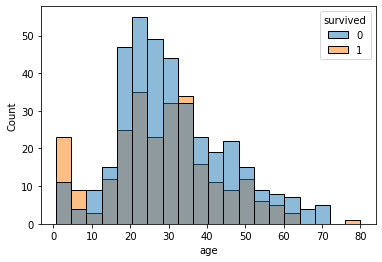

In [ ]:
# age와 survived의 관계
# 가로축는 age, 구간은 20개, hue 생존여부로 카테고리 분류
sns.histplot(data = train_df, x = 'age', bins = 20, hue ='survived')

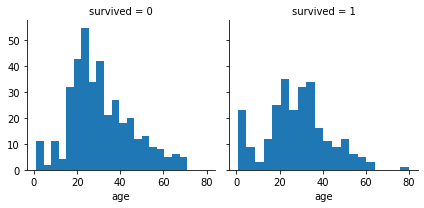

In [ ]:
# subplot처럼 그림을 그리는구간 나눔
# sns.FaceGrid(dataset, 기준은 survived)
a = sns.FacetGrid(train_df, col='survived')
# map(어떤것으로 그릴건지, 나이기준으로)
a.map(plt.hist, 'age', bins=20)

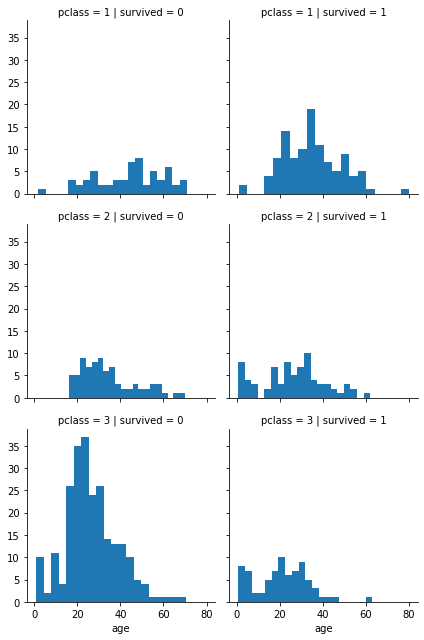

In [ ]:
# pclass 에 따른 age별 survived 유무
a = sns.FacetGrid(train_df, col='survived', row='pclass')
a.map(plt.hist, 'age', bins=20)

In [ ]:
# 필요없는 필드 삭제
names = train_df.columns
print(names)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [ ]:
# 4번째 부터 마지막까지 다 지워버려라
train_df = train_df.drop(names[4:], axis = 1)

In [ ]:
train_df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [ ]:
test_df = test_df.drop(names[4:], axis=1)

In [ ]:
test_df.head()

,survived,pclass,sex,age
800,0,2,male,34.00
801,1,2,female,31.00
802,1,1,male,11.00
803,1,3,male,0.42
804,1,3,male,27.00


In [ ]:
# 결측값 확인하고, 결측값을 어떻게 채울건지 고민
# age 칼럼 결측값 발생!!
print(train_df.isnull().sum())
print(test_df.isnull().sum())

survived      0
pclass        0
sex           0
age         163
dtype: int64
survived     0
pclass       0
sex          0
age         14
dtype: int64


- age의 평균으로 age 결측값 채우기

**만약 pclass 별 age의 평균으로 채우고 싶다면 아래 주석 처리된 코드 사용

In [ ]:
# 람다 함수 및 트랜스폼

In [ ]:
# fillna을 뭘로 채울건지? age의 평균값으로 채우겠다. 
train_df.fillna(train_df.mean()[['age']], inplace = True)
test_df.fillna(test_df.mean()[['age']], inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

survived    0
pclass      0
sex         0
age         0
dtype: int64
survived    0
pclass      0
sex         0
age         0
dtype: int64


In [ ]:
# 성별 인코딩(문자들을 숫자로 변환)
map_dict = {'female':0, 'male':1}
# sex가 female이면 0 male이면 1로 매핑시켜주고, 타입은 인트로 적용
train_df['sex'] = train_df['sex'].map(map_dict).astype(int)
test_df['sex'] = test_df['sex'].map(map_dict).astype(int)

In [ ]:
train_df.head()

,survived,pclass,sex,age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


In [ ]:
def function1(x):
  if x < 20:
    return 1
  elif x < 40:
    return 2
  elif x < 60:
    return 3
  else:
    return 4

In [ ]:
train_df['age'] = train_df['age'].apply(function1)
test_df['age'] = test_df['age'].apply(function1)

In [ ]:
train_df.head()

,survived,pclass,sex,age
0,0,3,1,2
1,1,1,0,2
2,1,3,0,2
3,1,1,0,2
4,0,3,1,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier #결정나무
import pandas as pd

In [ ]:
# 데이터분류
X_train = train_df.drop(['survived'], axis = 1)
Y_train = train_df['survived']
X_test = test_df.drop(['survived'], axis = 1)
Y_test = test_df['survived']

In [ ]:
X_train.head()

,pclass,sex,age
0,3,1,2
1,1,0,2
2,3,0,2
3,1,0,2
4,3,1,2


In [ ]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [ ]:
decision_tree = DecisionTreeClassifier()
# fit(x값, 라벨링값 학습 시킴)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
# 모델 정확도 검증
print(decision_tree.score(X_train, Y_train))
print(decision_tree.score(X_test, Y_test))

0.8
0.7692307692307693


In [ ]:
# 실제값 예측값 비교 구현
Y_pred = decision_tree.predict(X_test)
print(Y_pred)

[0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0]


In [ ]:
Y_test

800    0
801    1
802    1
803    1
804    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 91, dtype: int64

In [ ]:
len(Y_test)

91

# **CH05_03 머신러닝 모델 구성 및 결과 검증**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # 결정나무
import pandas as pd

In [ ]:
# 데이터분류
X_train = train_df.drop(['survived'], axis = 1) # 생존 제외한 데이터
Y_train = train_df['survived'] # 생존만 뽑아냄(정답)
X_test = test_df.drop(['survived'], axis = 1)
Y_test = test_df['survived']

In [ ]:
X_train.head()

,pclass,sex,age
0,3,1,2
1,1,0,2
2,3,0,2
3,1,0,2
4,3,1,2


In [ ]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [ ]:
# 모델 생성 및 학습(decision tree)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train) # decision_tree.fit(x값, y값)

DecisionTreeClassifier()

In [ ]:
# 모델 정확도 검증
print(decision_tree.score(X_train, Y_train))
print(decision_tree.score(X_test, Y_test))

0.8
0.7692307692307693


In [ ]:
# 실제값 예측값 비교 구현
Y_pred = decision_tree.predict(X_test) # X test 넣었을때 모델 결과값 어떻게 나왔는지 체크
print(Y_pred)

[0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0]


In [49]:
Y_test

800    0
801    1
802    1
803    1
804    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 91, dtype: int64

In [50]:
len(Y_pred)

91

In [51]:
len(Y_test)

91

In [52]:
# Y_test 시리즈 형태를 리스트로 변환
Y_test_list = list(Y_test)

In [53]:
Y_test_list[0]

0

In [55]:
Y_pred[0]

0

In [57]:
total = 0 
for i in range(len(Y_pred)):
  if Y_pred[i] == Y_test_list[i]:
    total += 1
  else:
    pass

print(total) # 일치한 값
print(total / len(Y_pred)) # 정확도

70
0.7692307692307693


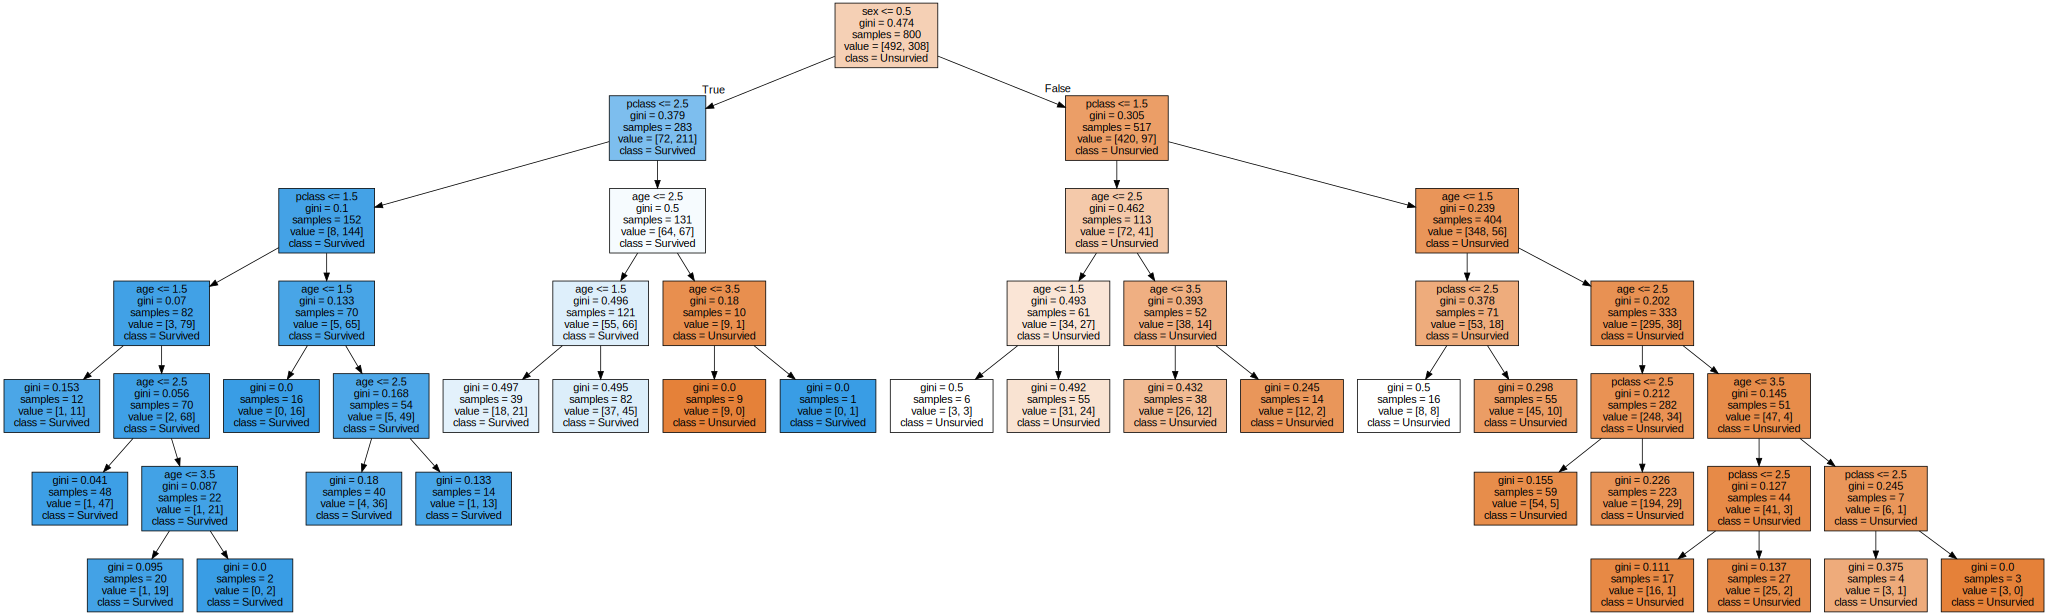

In [68]:
# graphviz 를 이용한 tree 구조 시각화
from sklearn.tree import export_graphviz

# 시각화 과정
export_graphviz(
    decision_tree,
    out_file = 'titanic.dot',
    feature_names = ['pclass','sex','age'],
    class_names = ['Unsurvied', 'Survived'],
    filled=True # 색 채울건지?
    )

import graphviz
f = open('titanic.dot')
dot_graph = f.read()
# 자원을 효율적으로 쓰기 위해서는 아래 주석 처리된 코드 사용(휘발성 데이터 저장 용도)
# with open('titanic.dot') as f: 
#    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename = 'titanic_tree')
dot